In [272]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
import scipy.stats as stats
import scipy.special as special
from sklearn.datasets import make_classification

In [273]:
n = 10
s = 0.1
b0 = 0.2
b1 = 0.4
x = np.random.uniform(size=n)
xbar = x.mean()
Sxx = np.sum((x - xbar)**2)

rng = np.random.default_rng(42)
y = b0 + b1*x + rng.normal(0, s, size=n)

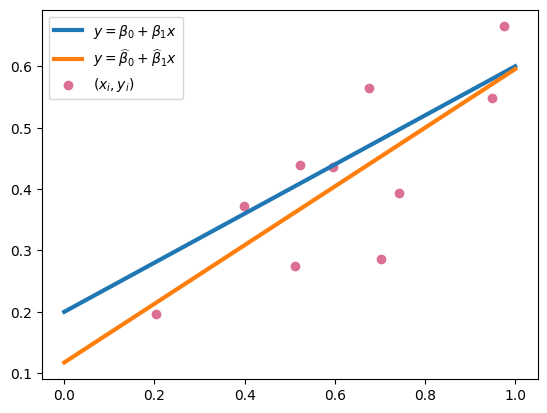

In [274]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
b0hat = model.intercept_.item()
b1hat = model.coef_.item()
b0hat, b1hat
plt.plot([0, 1], [b0, b0 + b1], lw=3, label="$y = \\beta_0 + \\beta_1 x$")
plt.plot([0, 1], [b0hat, b0hat + b1hat], lw=3, label="$y = \\widehat{\\beta}_0 + \\widehat{\\beta}_1 x$")
plt.scatter(x, y, c="palevioletred", label="$(x_i, y_i)$")
plt.legend();

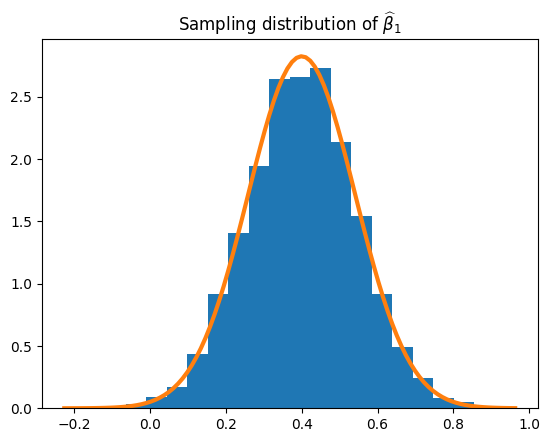

In [275]:
n_iter = 10000
b1hats = np.zeros(n_iter)
ses = np.zeros(n_iter)
rng = np.random.default_rng(42)
for i in range(n_iter):
    y = b0 + b1*x + rng.normal(0, s, size=n)
    model.fit(x.reshape(-1, 1), y)
    b0hat = model.intercept_.item()
    b1hat = model.coef_.item()
    b1hats[i] = b1hat
    ses[i] = np.sqrt(np.sum((b0hat + b1hat*x - y)**2)/(n - 2))

plt.hist(b1hats, bins=20, density=True)
plt.title("Sampling distribution of $\\widehat{\\beta}_1$");

xmin, xmax = plt.xlim()
t = np.linspace(xmin, xmax, 100)
plt.plot(t, stats.norm(b1, s/np.sqrt(Sxx)).pdf(t), lw=3)


$$
\mathbb{V}(\hat\beta_1) = \frac{\sigma^2}{S_{xx}}
$$

In [276]:
b1hats.mean(), b1hats.std()

(0.4003677843126111, 0.14302734439489267)

$$
P(Y=1\mid\beta) = \frac{\exp(\beta\cdot x_i)}{1 + \exp(\beta\cdot x_i)}
$$

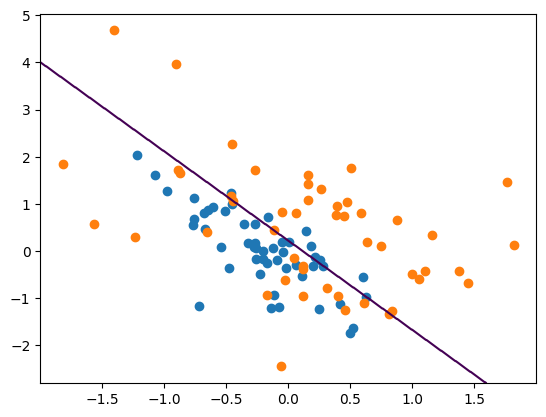

In [277]:
rng = np.random.default_rng(42)
X, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.25,
    random_state=2)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])

model = LogisticRegression()
model.fit(X, y)
model.intercept_, model.coef_
b0 = model.intercept_.item()
b = model.coef_.squeeze()

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
u = np.linspace(xmin, xmax, 1000)
v = np.linspace(ymin, ymax, 1000)
U, V = np.meshgrid(u, v)
W = model.predict(np.hstack([U.ravel().reshape(-1, 1), V.ravel().reshape(-1, 1)])).reshape(U.shape)
plt.contour(U, V, W, levels=[0]);

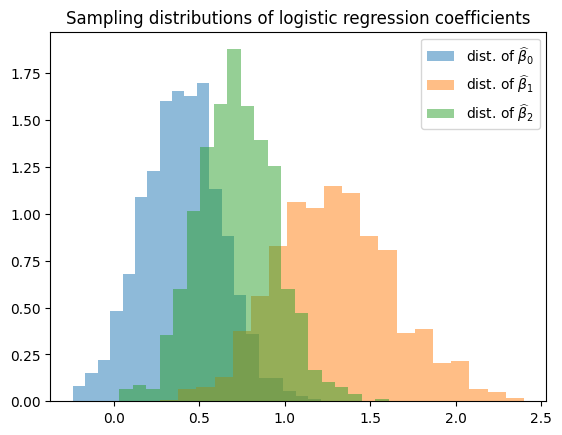

In [279]:
n_iter = 1000

b0hats = np.zeros(n_iter)
bhats = np.zeros((n_iter, 2))
rng = np.random.default_rng(42)
model = LogisticRegression()

for i in range(n_iter):
    p = special.expit(b0 + X.dot(b))
    y = 1*(rng.uniform(size=p.shape) < p)
    model.fit(X, y)
    b0hat = model.intercept_.item()
    b0hats[i] = b0hat
    bhat = model.coef_.squeeze()
    bhats[i] = bhat

plt.hist(b0hats, bins=20, alpha=0.5, label="dist. of $\\widehat{\\beta}_0$", density=True)
plt.hist(bhats[:,0], bins=20, alpha=0.5, label="dist. of $\\widehat{\\beta}_1$", density=True)
plt.hist(bhats[:,1], bins=20, alpha=0.5, label="dist. of $\\widehat{\\beta}_2$", density=True)
plt.title("Sampling distributions of logistic regression coefficients")
plt.legend();


In [281]:
W = np.diag(np.exp(b0 + X.dot(b))/np.square(1 + np.exp(b0 + X.dot(b))))
np.sqrt(np.linalg.inv(X.T @ W @ X))

array([[0.19938395, 0.09436265],
       [0.09436265, 0.11603764]])

In [254]:
p0 = 0.6
n = 50
n_iter = 100000
rng = np.random.default_rng(42)
x = rng.uniform(size=n)

LRs = np.zeros(n_iter)

model = LogisticRegression()

for i in range(n_iter):
    y = 1*(rng.uniform(size=n) < p0)
    model.fit(x.reshape(-1, 1), y)
    b0hat = model.intercept_.item()
    b1hat = model.coef_.item()
    n1 = y.sum()
    L0 = n1*np.log(p0) + (n - n1)*np.log(1 - p0)
    S = special.expit(b0hat + b1hat*x)
    L1 = np.sum(y*np.log(S) + (1 - y)*np.log(1 - S))
    LR = -2*(L0 - L1)
    LRs[i] = LR

(0.0, 0.6)

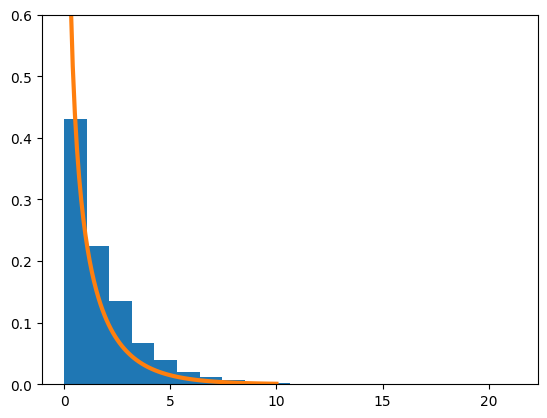

In [259]:
plt.hist(LRs, bins=20, density=True)
t = np.linspace(0.1, 10, 100)
plt.plot(t, stats.chi2(df=1).pdf(t), lw=3)
plt.ylim(0, 0.6)

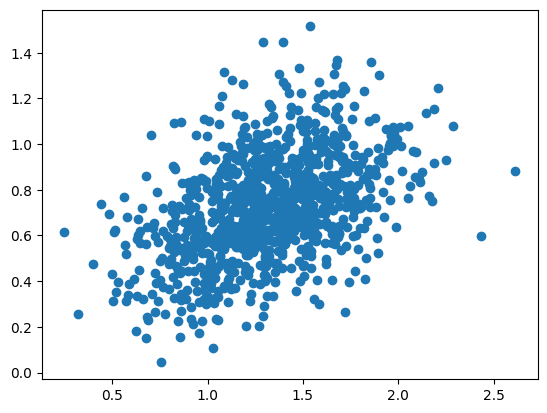

In [265]:
plt.scatter(bhats[:,0], bhats[:,1])

In [268]:
np.sqrt(np.cov(bhats.T))

array([[0.3375929 , 0.18478856],
       [0.18478856, 0.22949729]])

In [230]:
y = 1*(rng.uniform(size=n) < p0)
y.sum()

28

50